In [ ]:
#!pip install tensorflow


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm
from pylab import rcParams
from sklearn.metrics import mean_squared_error
import tensorflow as tf


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading Dataset

df_p2=pd.read_csv("D:\project\Website Vistiors Daywise - Sheet1.csv",encoding='latin1')
df_p2

,Date,Daily_Visitors
0,10/01/2021,2649
1,10/02/2021,2000
2,10/03/2021,2011
3,10/04/2021,3219
4,10/05/2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


# EDA

In [ ]:
df_p2.describe()

,Daily_Visitors
count,173.000000
mean,2829.907514
std,765.194741
min,1245.000000
25%,2336.000000
50%,2751.000000
75%,3207.000000
max,7165.000000


In [ ]:
df_p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily_Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [ ]:
df_p2['Date'].unique()

array(['10/01/2021', '10/02/2021', '10/03/2021', '10/04/2021',
       '10/05/2021', '10/06/2021', '10/07/2021', '10/08/2021',
       '10/09/2021', '10/10/2021', '10/11/2021', '10/12/2021',
       '13-10-2021', '14-10-2021', '15-10-2021', '16-10-2021',
       '17-10-2021', '18-10-2021', '19-10-2021', '20-10-2021',
       '21-10-2021', '22-10-2021', '23-10-2021', '24-10-2021',
       '25-10-2021', '26-10-2021', '27-10-2021', '28-10-2021',
       '29-10-2021', '30-10-2021', '31-10-2021', '11/01/2021',
       '11/02/2021', '11/03/2021', '11/04/2021', '11/05/2021',
       '11/06/2021', '11/07/2021', '11/08/2021', '11/09/2021',
       '11/10/2021', '11/11/2021', '11/12/2021', '13-11-2021',
       '14-11-2021', '15-11-2021', '16-11-2021', '17-11-2021',
       '18-11-2021', '19-11-2021', '20-11-2021', '21-11-2021',
       '22-11-2021', '23-11-2021', '24-11-2021', '25-11-2021',
       '26-11-2021', '27-11-2021', '28-11-2021', '29-11-2021',
       '30-11-2021', '12/01/2021', '12/02/2021', '12/03

In [ ]:
# Converting string datatype into Date datatype

from datetime import datetime as dt
df_p2['Date'] = pd.to_datetime(  df_p2['Date'])

In [ ]:
df_p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            173 non-null    datetime64[ns]
 1   Daily_Visitors  173 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [ ]:
df_p2['year'] = df_p2['Date'].dt.year
print(df_p2)

          Date  Daily_Visitors  year
0   2021-10-01            2649  2021
1   2021-10-02            2000  2021
2   2021-10-03            2011  2021
3   2021-10-04            3219  2021
4   2021-10-05            3870  2021
..         ...             ...   ...
168 2022-03-18            2494  2022
169 2022-03-19            2976  2022
170 2022-03-20            2534  2022
171 2022-03-21            3641  2022
172 2022-03-22            4031  2022

[173 rows x 3 columns]


Distribution of Visitors:
0      2649
1      2000
2      2011
3      3219
4      3870
       ... 
168    2494
169    2976
170    2534
171    3641
172    4031
Name: Daily_Visitors, Length: 173, dtype: int64


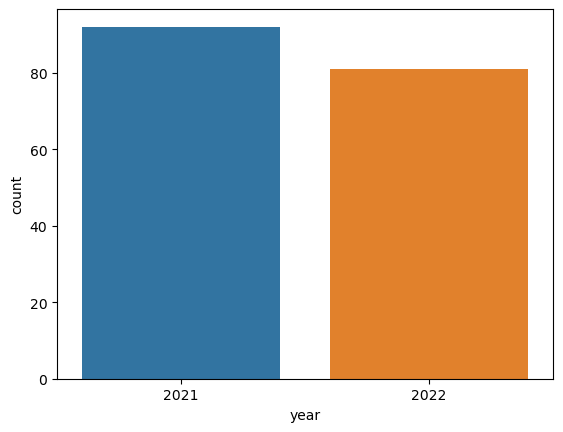

In [ ]:
# Count of data in respective year

sns.countplot(x="year", data=df_p2);
print("Distribution of Visitors:")
print(df_p2.Daily_Visitors);

In [ ]:
df_p2['month'] = df_p2['Date'].dt.month
print(df_p2)

          Date  Daily_Visitors  year  month
0   2021-10-01            2649  2021     10
1   2021-10-02            2000  2021     10
2   2021-10-03            2011  2021     10
3   2021-10-04            3219  2021     10
4   2021-10-05            3870  2021     10
..         ...             ...   ...    ...
168 2022-03-18            2494  2022      3
169 2022-03-19            2976  2022      3
170 2022-03-20            2534  2022      3
171 2022-03-21            3641  2022      3
172 2022-03-22            4031  2022      3

[173 rows x 4 columns]


Distribution of Visitors:
2594    2
2534    2
2343    1
3184    1
3565    1
       ..
2239    1
3106    1
3403    1
3371    1
4031    1
Name: Daily_Visitors, Length: 171, dtype: int64


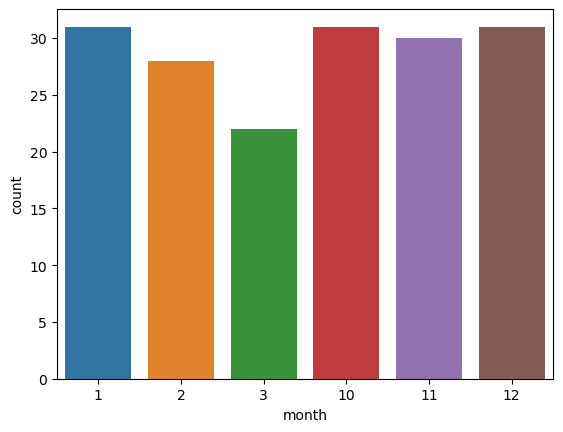

In [ ]:
# Count of data in respective month

sns.countplot(x="month", data=df_p2);
print("Distribution of Visitors:")
print(df_p2.Daily_Visitors.value_counts());

In [ ]:
df_p2['month']=df_p2.Date.dt.strftime('%b')
df_p2

,Date,Daily_Visitors,year,month
0,2021-10-01,2649,2021,Oct
1,2021-10-02,2000,2021,Oct
2,2021-10-03,2011,2021,Oct
3,2021-10-04,3219,2021,Oct
4,2021-10-05,3870,2021,Oct
...,...,...,...,...
168,2022-03-18,2494,2022,Mar
169,2022-03-19,2976,2022,Mar
170,2022-03-20,2534,2022,Mar
171,2022-03-21,3641,2022,Mar


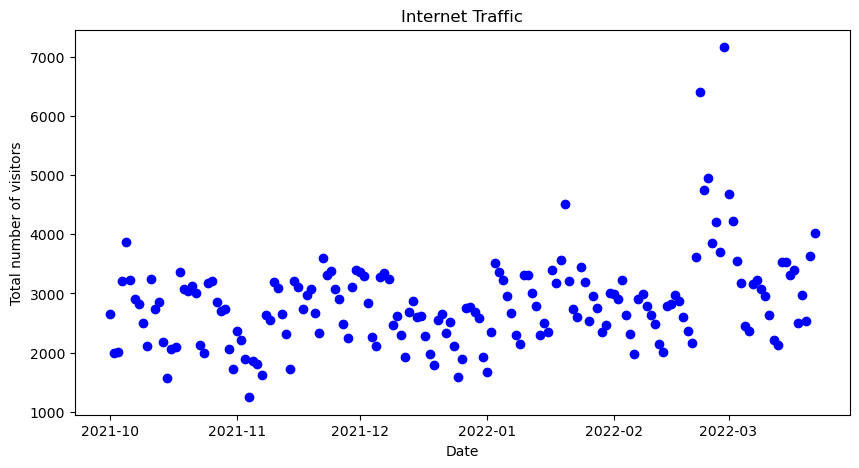

In [ ]:
# Scatter plot for Date vs Daily Visitors

fig = plt.figure(figsize = (10, 5))
plt.scatter(df_p2['Date'],df_p2['Daily_Visitors'], color ='blue')
plt.xlabel("Date")
plt.ylabel("Total number of visitors")
plt.title("Internet Traffic")
plt.show()


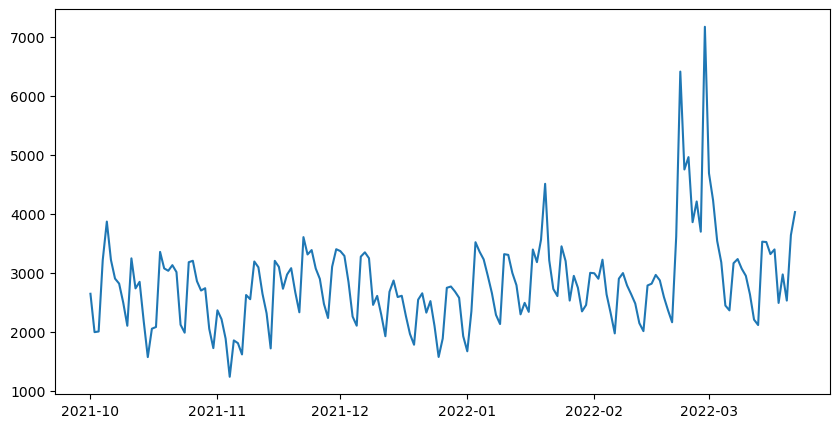

In [ ]:
# Line chart for Date vs Daily Visitors

fig = plt.figure(figsize = (10, 5))
plt.plot(df_p2['Date'],df_p2['Daily_Visitors'])

<Axes: >

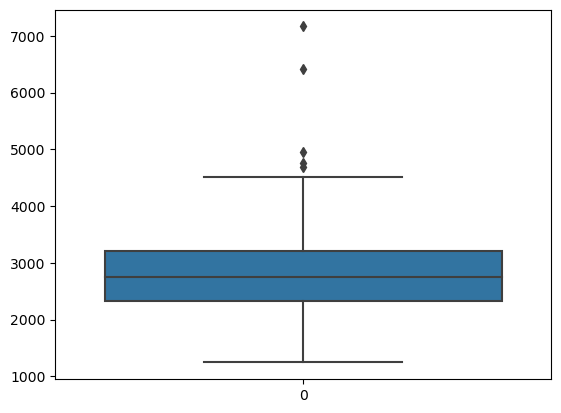

In [ ]:
# Outliers in Daily Visitors

sns.boxplot(df_p2['Daily_Visitors'])

<Axes: xlabel='month', ylabel='Daily_Visitors'>

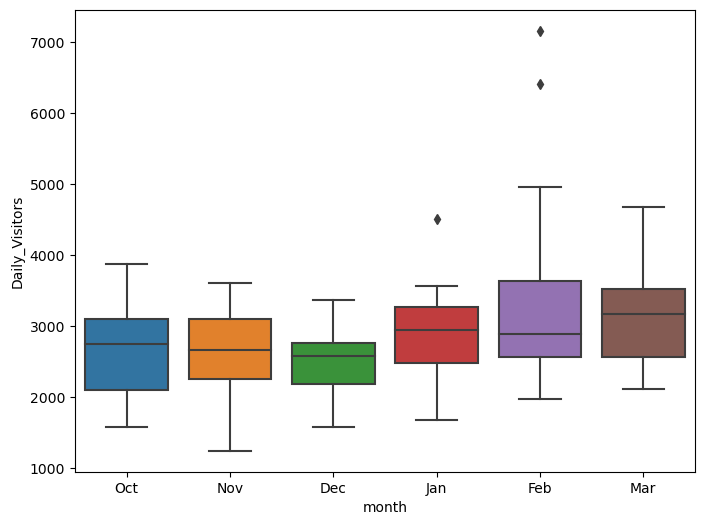

In [ ]:
# Finding outliers per month
plt.figure(figsize = (8,6))
sns.boxplot(x = 'month', y = "Daily_Visitors", data = df_p2)

We are not considering these values as outliers.

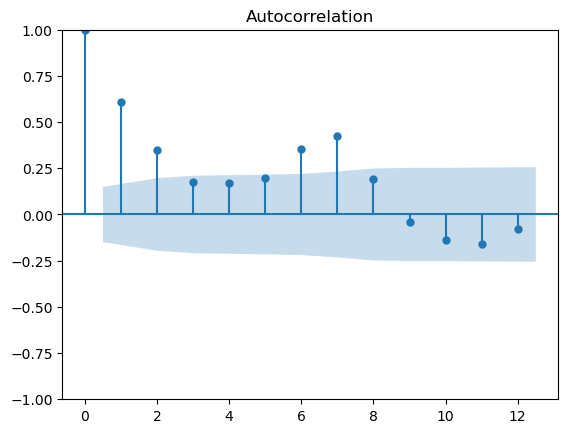

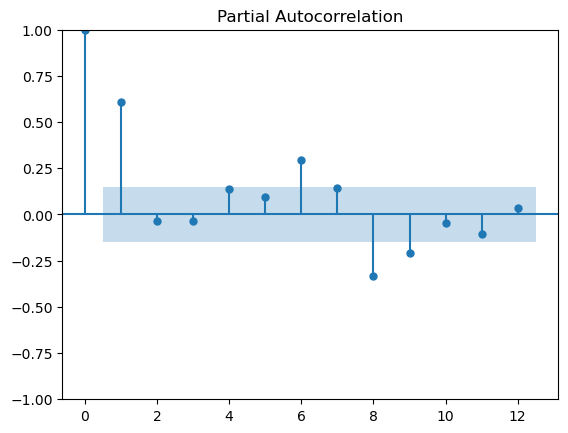

In [ ]:
# Plotting ACF and PACF plot for (p,q) values.
tsa_plots.plot_acf(df_p2.Daily_Visitors, lags = 12)
tsa_plots.plot_pacf(df_p2.Daily_Visitors, lags = 12)
plt.show()

In [ ]:
data1=df_p2.copy()

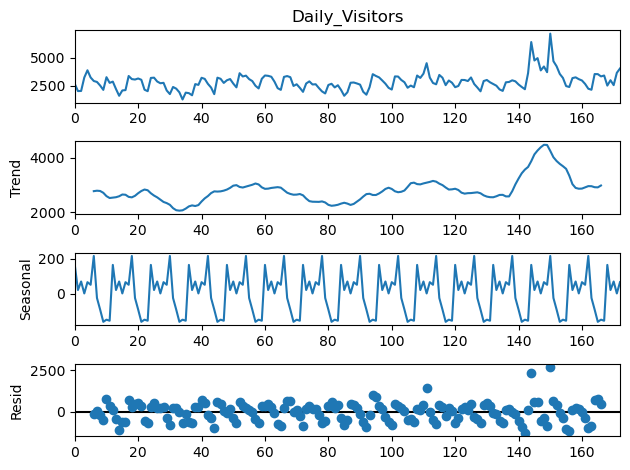

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data1.Daily_Visitors,period=12)
decompose_ts_add.plot()

plt.show()

### In the above chart we can see that the trend,seasonal and residual of daily visitors

In [ ]:
data1["t"] = np.arange(1, 174)
data1["t_square"] = data1["t"]*data1["t"]
data1["log_visitors"] = np.log(data1["Daily_Visitors"])
data1 = pd.get_dummies(data1)
data1.rename(columns = {'month_Dec':'dec', 'month_Feb':'feb', 'month_Jan':'jan', 'month_Mar':'mar',
                        'month_Nov':'nov', 'month_Oct':'oct'}, inplace = True)
data1


,Date,Daily_Visitors,year,t,t_square,log_visitors,dec,feb,jan,mar,nov,oct
0,2021-10-01,2649,2021,1,1,7.881937,0,0,0,0,0,1
1,2021-10-02,2000,2021,2,4,7.600902,0,0,0,0,0,1
2,2021-10-03,2011,2021,3,9,7.606387,0,0,0,0,0,1
3,2021-10-04,3219,2021,4,16,8.076826,0,0,0,0,0,1
4,2021-10-05,3870,2021,5,25,8.261010,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022-03-18,2494,2022,169,28561,7.821643,0,0,0,1,0,0
169,2022-03-19,2976,2022,170,28900,7.998335,0,0,0,1,0,0
170,2022-03-20,2534,2022,171,29241,7.837554,0,0,0,1,0,0
171,2022-03-21,3641,2022,172,29584,8.200014,0,0,0,1,0,0


In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Daily_Visitors):
    result = adfuller(Daily_Visitors)
    labels = ['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, accept the null hypothesis. Data is non-stationary ")

In [ ]:
adfuller_test(df_p2['Daily_Visitors'])

ADF Test Statistic : -2.3585866739043726
p-value : 0.15376766558874538
Lags Used : 14
Number of Observations Used : 158
weak evidence against null hypothesis, accept the null hypothesis. Data is non-stationary 


In [ ]:
data1['visitors_First_Difference'] = data1['Daily_Visitors'] - data1['Daily_Visitors'].shift(1)
data1

,Date,Daily_Visitors,year,t,t_square,log_visitors,dec,feb,jan,mar,nov,oct,visitors_First_Difference
0,2021-10-01,2649,2021,1,1,7.881937,0,0,0,0,0,1,NaN
1,2021-10-02,2000,2021,2,4,7.600902,0,0,0,0,0,1,-649.0
2,2021-10-03,2011,2021,3,9,7.606387,0,0,0,0,0,1,11.0
3,2021-10-04,3219,2021,4,16,8.076826,0,0,0,0,0,1,1208.0
4,2021-10-05,3870,2021,5,25,8.261010,0,0,0,0,0,1,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022-03-18,2494,2022,169,28561,7.821643,0,0,0,1,0,0,-905.0
169,2022-03-19,2976,2022,170,28900,7.998335,0,0,0,1,0,0,482.0
170,2022-03-20,2534,2022,171,29241,7.837554,0,0,0,1,0,0,-442.0
171,2022-03-21,3641,2022,172,29584,8.200014,0,0,0,1,0,0,1107.0


In [ ]:
data1.visitors_First_Difference.replace(np.NaN,data1.visitors_First_Difference.median(),inplace=True)
data1

,Date,Daily_Visitors,year,t,t_square,log_visitors,dec,feb,jan,mar,nov,oct,visitors_First_Difference
0,2021-10-01,2649,2021,1,1,7.881937,0,0,0,0,0,1,-132.0
1,2021-10-02,2000,2021,2,4,7.600902,0,0,0,0,0,1,-649.0
2,2021-10-03,2011,2021,3,9,7.606387,0,0,0,0,0,1,11.0
3,2021-10-04,3219,2021,4,16,8.076826,0,0,0,0,0,1,1208.0
4,2021-10-05,3870,2021,5,25,8.261010,0,0,0,0,0,1,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022-03-18,2494,2022,169,28561,7.821643,0,0,0,1,0,0,-905.0
169,2022-03-19,2976,2022,170,28900,7.998335,0,0,0,1,0,0,482.0
170,2022-03-20,2534,2022,171,29241,7.837554,0,0,0,1,0,0,-442.0
171,2022-03-21,3641,2022,172,29584,8.200014,0,0,0,1,0,0,1107.0


In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(visitors_First_Difference):
    result = adfuller(visitors_First_Difference)
    labels = ['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, accept the null hypothesis. Data is non-stationary ")

In [ ]:
adfuller_test(data1['visitors_First_Difference'])

ADF Test Statistic : -6.609893859176963
p-value : 6.41627394527044e-09
Lags Used : 12
Number of Observations Used : 160
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


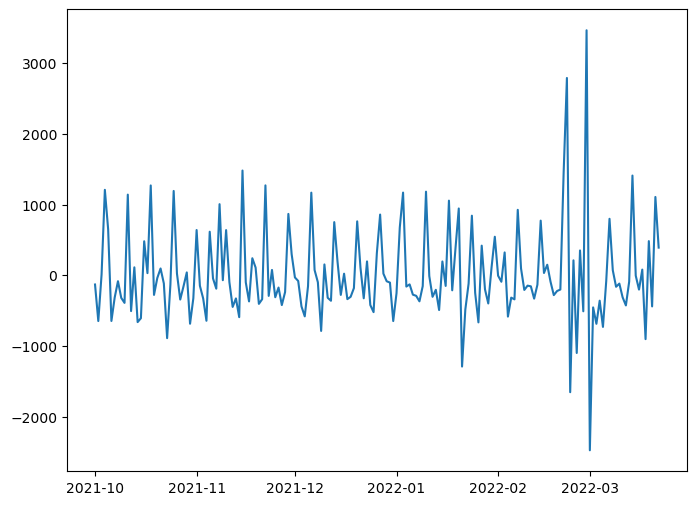

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_p2['Date'], data1['visitors_First_Difference'])

In [ ]:
data1.to_csv('cleaned_data.csv')

## Splitting Data

In [ ]:
train = data1.head(110)
test = data1.tail(63)

## Model Building for Model Based Forcasting Methods

In [ ]:
# Linear
import statsmodels.formula.api as smf
model_linear = smf.ols('Daily_Visitors~t', data = train).fit()
preds_linear = pd.Series(model_linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_linear))**2))
rmse_linear

1064.6461676160486

<Axes: title={'center': 'Linear'}>

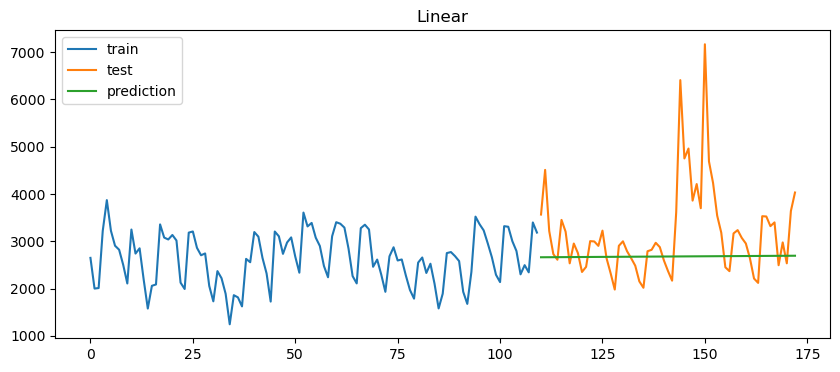

In [ ]:
plt.title('Linear')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_linear.plot(legend = True, label = 'prediction')

In [ ]:
# Exponential
model_exp = smf.ols('log_visitors~t',data = train).fit()
preds_exp = pd.Series(model_exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(np.exp(preds_exp)))**2))
rmse_exp

1082.7247156273029

<Axes: title={'center': 'Exponential'}>

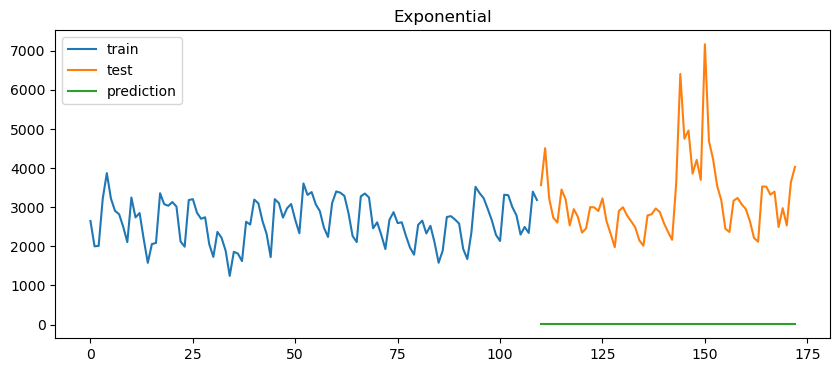

In [ ]:
plt.title('Exponential')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_exp.plot(legend = True, label = 'prediction')

In [ ]:
# Quadratic
model_quad = smf.ols('Daily_Visitors~t+t_square',data = train).fit()
preds_quad = pd.Series(model_quad.predict(test[["t","t_square"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_quad))**2))
rmse_quad

970.6855824895564

<Axes: title={'center': 'Quadratic'}>

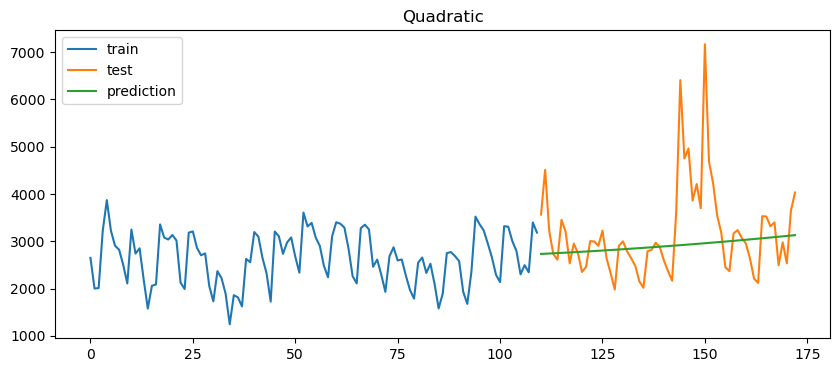

In [ ]:
plt.title('Quadratic')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_quad.plot(legend = True, label = 'prediction')

In [ ]:
# Additive seasonality
model_as = smf.ols('Daily_Visitors~jan+feb+mar+oct+nov+dec', data = train).fit()
preds_as = pd.Series(model_as.predict(test[['jan', 'feb', 'mar', 'oct', 'nov', 'dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_as))**2))
rmse_add_sea

1357.345362399618

<Axes: title={'center': 'Additive seasonality'}>

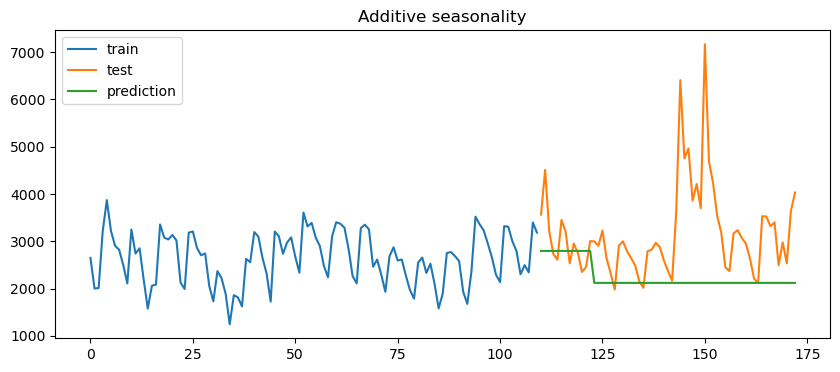

In [ ]:
plt.title('Additive seasonality')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_as.plot(legend = True, label = 'prediction')

In [ ]:
# Additive seasonality Quadratic
model_asq = smf.ols('Daily_Visitors~jan+feb+mar+oct+nov+dec+t+t_square', data = train).fit()
preds_asq = pd.Series(model_asq.predict(test[['jan', 'feb', 'mar', 'oct', 'nov', 'dec', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_asq))**2))
rmse_add_sea_quad

1731.5766613720284

<Axes: title={'center': 'Additive seasonality Quadratic'}>

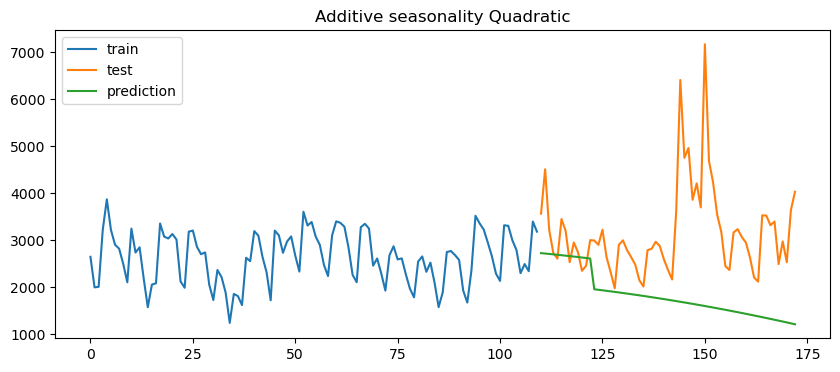

In [ ]:
plt.title('Additive seasonality Quadratic')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_asq.plot(legend = True, label = 'prediction')

In [ ]:
# Multiplicative seasonality
model_ms = smf.ols('log_visitors~jan+feb+mar+oct+nov+dec', data = train).fit()
preds_ms = pd.Series(model_ms.predict(test[['jan', 'feb', 'mar', 'oct', 'nov', 'dec']]))
rmse_multi_sea = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(np.exp(preds_ms)))**2))
rmse_multi_sea

2564.7946146242975

<Axes: title={'center': 'Multiplicative seasonality'}>

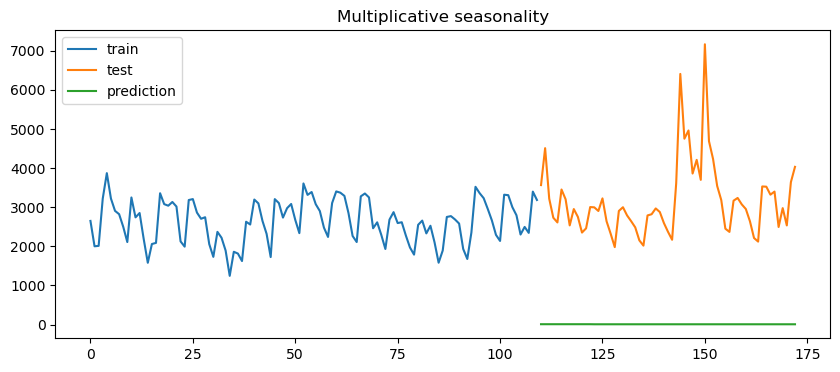

In [ ]:
plt.title('Multiplicative seasonality')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_ms.plot(legend = True, label = 'prediction')

In [ ]:
# Multiplicative Additive seasonality
model_mas = smf.ols('log_visitors~jan+feb+mar+oct+nov+dec+t', data = train).fit()
preds_mas = pd.Series(model_mas.predict(test[['t', 'jan', 'feb', 'mar', 'oct', 'nov', 'dec']]))
rmse_multi_add_sea = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(np.exp(preds_mas)))**2))
rmse_multi_add_sea

2487.6867092473767

<Axes: title={'center': 'Multiplicative Additive seasonality'}>

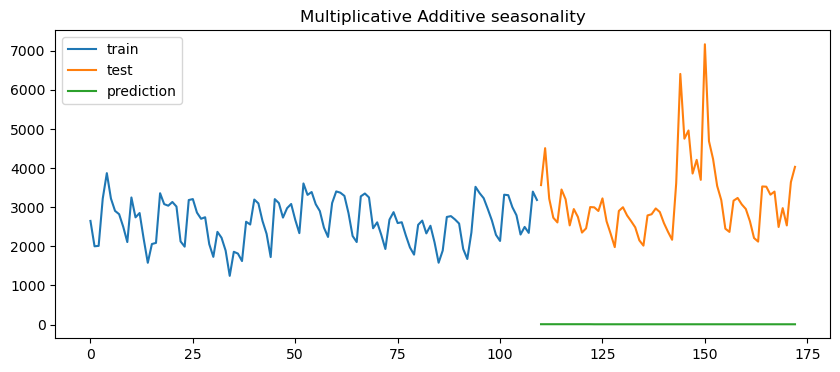

In [ ]:
plt.title('Multiplicative Additive seasonality')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_mas.plot(legend = True, label = 'prediction')

### ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Daily_Visitors'],order=(7,0,5))
model_fit=model.fit()
preds = model_fit.predict(start = test.index[0],end = test.index[-1])
rmse_preds_arma = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds))**2))
rmse_preds_arma

993.120233576446

<Axes: title={'center': 'ARMA'}>

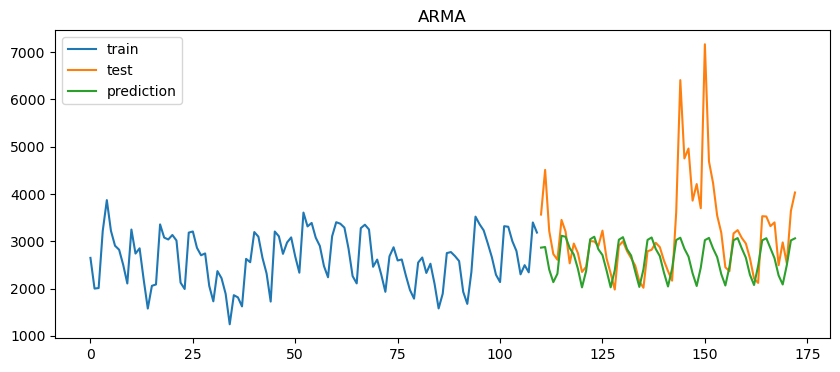

In [ ]:
plt.title('ARMA')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds.plot(legend = True, label = 'prediction')

In [ ]:
model=ARIMA(train['visitors_First_Difference'],order=(7,1,5))
model_fit=model.fit()
preds = model_fit.predict(start = test.index[0],end = test.index[-1])
rmse_preds_arima = np.sqrt(np.mean((np.array(test['visitors_First_Difference'])-np.array(preds))**2))
rmse_preds_arima

758.2652852969303

<Axes: title={'center': 'ARIMA'}>

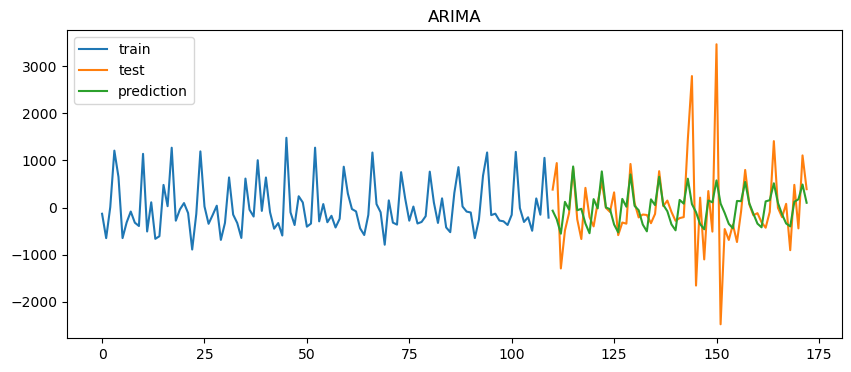

In [ ]:
plt.title('ARIMA')
train['visitors_First_Difference'].plot(legend = True, label = 'train', figsize = (10,4))
test['visitors_First_Difference'].plot(legend = True, label = 'test')
preds.plot(legend = True, label = 'prediction')

In [ ]:
# SARIMAX
import statsmodels.api as sm
sar_model = sm.tsa.statespace.SARIMAX(train['Daily_Visitors'],order = (1, 1, 1),seasonal_order = (1,1,1,2))
results=sar_model.fit()
sar_preds = results.predict(start = test.index[0],end = test.index[-1])
sar_rmse = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds))**2))
sar_rmse

3316.2601417275973

<Axes: title={'center': 'SARIMAX'}>

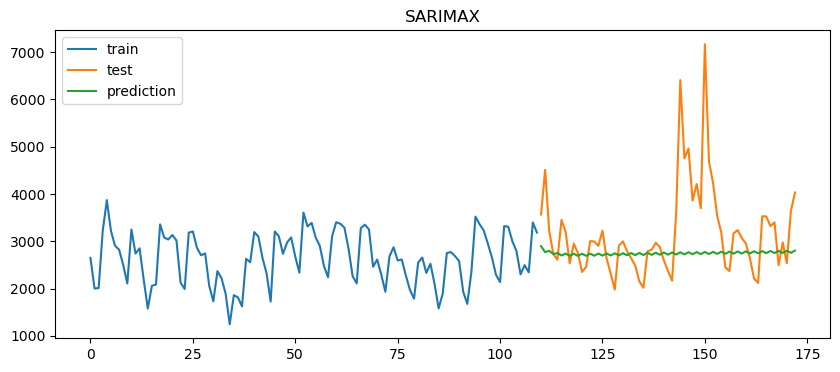

In [ ]:
plt.title('SARIMAX')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
sar_preds.plot(legend = True, label = 'prediction')

In [ ]:
def RMSE(org, preds):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(preds))**2))
    return rmse

In [ ]:
# Holt method
from statsmodels.tsa.holtwinters import Holt
model_h = Holt(train["Daily_Visitors"]).fit()
preds_h = model_h.predict(start = test.index[0],end = test.index[-1])
rmse_holt = RMSE(test.Daily_Visitors, preds_h)
rmse_holt

1733.2441451323482

<Axes: title={'center': 'Holt method'}>

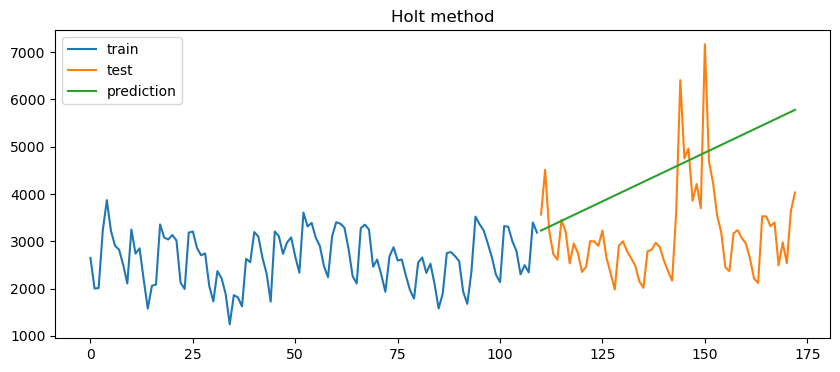

In [ ]:
plt.title('Holt method')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_h.plot(legend = True, label = 'prediction')

In [ ]:
# Holts winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_hwe_as_at = ExponentialSmoothing(train["Daily_Visitors"],seasonal = "add",trend = "add",seasonal_periods = 12).fit()
preds_hwe_as_at = model_hwe_as_at.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_sea_add_trend = RMSE(test.Daily_Visitors, preds_hwe_as_at)
rmse_hwe_add_sea_add_trend

1020.5200785071806

<Axes: title={'center': 'Holts winter exponential smoothing with additive seasonality and additive trend'}>

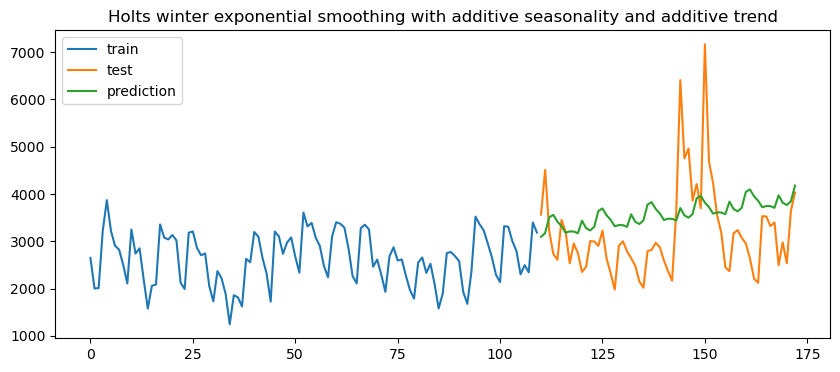

In [ ]:
plt.title('Holts winter exponential smoothing with additive seasonality and additive trend')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_hwe_as_at.plot(legend = True, label = 'prediction')

In [ ]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
model_hwe_ms_at = ExponentialSmoothing(train["Daily_Visitors"],seasonal = "mul",trend = "add",seasonal_periods = 12).fit()
preds_hwe_ms_at = model_hwe_ms_at.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_multi_sea_add_trend = RMSE(test.Daily_Visitors, preds_hwe_ms_at)
rmse_hwe_multi_sea_add_trend

1455.6360362500593

<Axes: title={'center': 'Holts winter exponential smoothing with multiplicative seasonality and additive trend'}>

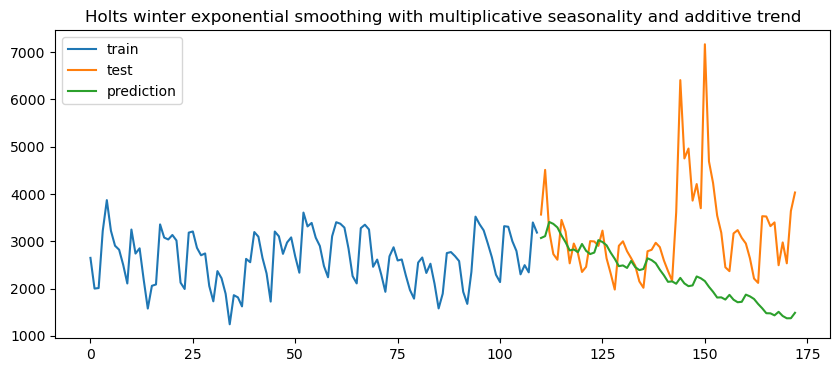

In [ ]:
plt.title('Holts winter exponential smoothing with multiplicative seasonality and additive trend')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_hwe_ms_at.plot(legend = True, label = 'prediction')

In [ ]:
list = [['Linear', rmse_linear], ['Exponential', rmse_exp], ['Quadratic', rmse_quad], ['Additive Seasonality', rmse_add_sea],
        ['Additive Seasonality Quadratic', rmse_add_sea_quad], ['Multiplicative Seasonality', rmse_multi_sea],
        ['Multiplicative Additive Seasonality', rmse_multi_add_sea],['ARMA', rmse_preds_arma], ['ARIMA', rmse_preds_arima],
        ['SARIMAX', sar_rmse], ['Holt', rmse_holt],
        ['Holt Winters Exp Additive Seasonality and Trend', rmse_hwe_add_sea_add_trend],
        ['Holt Winters Exp Multi Seasonality and Additive Trend', rmse_hwe_multi_sea_add_trend]]

In [ ]:
dataset = pd.DataFrame(list, columns =['Model', 'RMSE_Value'])
dataset

,Model,RMSE_Value
0,Linear,1064.646168
1,Exponential,1082.724716
2,Quadratic,970.685582
3,Additive Seasonality,1357.345362
4,Additive Seasonality Quadratic,1731.576661
5,Multiplicative Seasonality,2564.794615
6,Multiplicative Additive Seasonality,2487.686709
7,ARMA,993.120234
8,ARIMA,758.265285
9,SARIMAX,3316.260142


## Final Model Building with ARIMA

In [ ]:
final_model = ARIMA(data1['Daily_Visitors'],order=(7,1,5)).fit()
forecast = final_model.forecast()
final_model.predict()

0         0.000000
1      2685.392721
2      1871.837587
3      1645.948301
4      3076.373212
          ...     
168    2961.829643
169    2247.944833
170    2886.745027
171    3773.495623
172    3694.637567
Name: predicted_mean, Length: 173, dtype: float64

In [ ]:
a=final_model.forecast()

In [ ]:
df = pd.DataFrame(a, columns = ['pred'])
df

,pred
173,3466.074032
